In [2]:
import numpy as np
import matplotlib.pyplot as plt

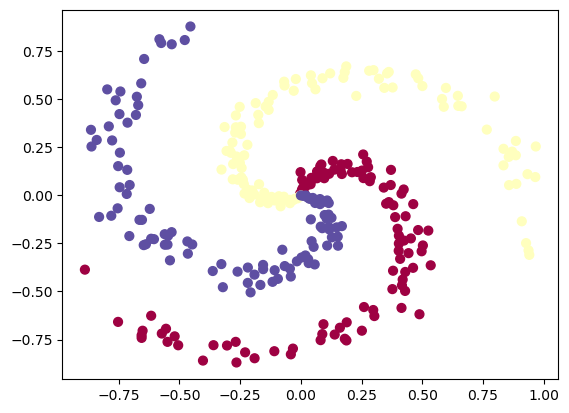

In [3]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print(f"iteration {i}: loss {loss}")
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg * W  # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.101091815133086
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 10: loss 0.9088190649552349
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 20: loss 0.837414951991772
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 30: loss 0.8051292212214394
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 40: loss 0.7884191815443906
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 50: loss 0.778958232493317
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 60: loss 0.7732585733583027
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
iteration 70: loss 0.7696677710145385
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3)
(300, 3

In [35]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f"Accuray: {np.mean(predicted_class == y)}")

Accuray: 0.52


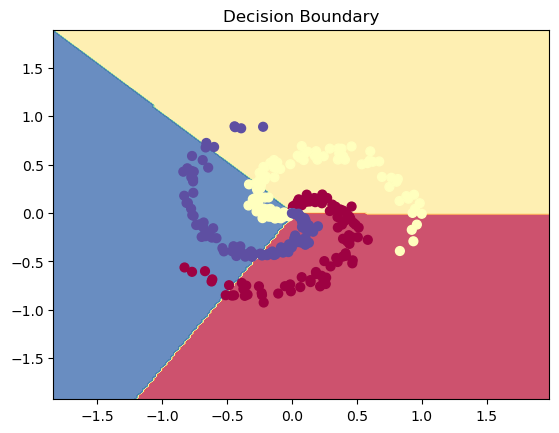

In [6]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, W, b):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Generate predictions for each point in the mesh
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")

plot_decision_boundary(X, y, W, b)
plt.show()